# Non-Responsive Coding

## Evironment Set-up

Use options below to uncomment drive path of choice:

In [1]:
# macOS/OS X
# drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache/'

# Windows (a good guess)
# drive_path = 'e:/data/dynamic-brain-workshop/brain_observatory_cache'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2017/data/dynamic-brain-workshop/brain_observatory_cache'

# AWS
drive_path = '/data/dynamic-brain-workshop/brain_observatory_cache/'

Import modules and Brain Observatory cache:

In [2]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import sys
import h5py
import matplotlib.pyplot as plt
from NonResponsiveCodingModule import *
%matplotlib inline
# Function variables dependent on previous functions. Please see functions description for a description of function input/output

/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json
all targeted structures: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']
all stimuli: ['drifting_gratings', 'locally_sparse_noise', 'locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_three', 'natural_movie_two', 'natural_scenes', 'spontaneous', 'static_gratings']
{'Nr5a1-Cre': 'Layer 4', 'Cux2-CreERT2': 'Layer 2/3 & 4', 'Scnn1a-Tg3-Cre': 'Layer 4', 'Rbp4-Cre_KL100': 'Layer 5', 'Rorb-IRES2-Cre': 'Layer 4', 'Emx1-IRES-Cre': 'Pan excitatory expression'}
[571541563, 576208803, 580051757, 575892535, 560363325, 560782654, 576714442, 574034739, 573864648, 571039045, 569981238, 569645688, 570008442, 553568029, 570428250, 575710989]


In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(drive_path,'brain_observatory_manifest.json')
print manifest_file

boc = BrainObservatoryCache(manifest_file=manifest_file)

/data/dynamic-brain-workshop/brain_observatory_cache/brain_observatory_manifest.json


In [4]:
# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print 'all targeted structures: ' + str(targeted_structures)

# Download a list of all stimuli
stims = boc.get_all_stimuli()
print 'all stimuli: ' + str(stims)

all targeted structures: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']
all stimuli: ['drifting_gratings', 'locally_sparse_noise', 'locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_three', 'natural_movie_two', 'natural_scenes', 'spontaneous', 'static_gratings']


In [5]:
# Print Dictionary of Cre-lines availble in BOC paired with their layer of expression
cre_to_layer={} 
cre_to_layer['Cux2-CreERT2']='Layer 2/3 & 4'
cre_to_layer['Emx1-IRES-Cre']='Pan excitatory expression'
cre_to_layer['Nr5a1-Cre']='Layer 4'
cre_to_layer['Rbp4-Cre_KL100']='Layer 5'
cre_to_layer['Rorb-IRES2-Cre']='Layer 4'
cre_to_layer['Scnn1a-Tg3-Cre']='Layer 4'
print(cre_to_layer)

{'Nr5a1-Cre': 'Layer 4', 'Cux2-CreERT2': 'Layer 2/3 & 4', 'Scnn1a-Tg3-Cre': 'Layer 4', 'Rbp4-Cre_KL100': 'Layer 5', 'Rorb-IRES2-Cre': 'Layer 4', 'Emx1-IRES-Cre': 'Pan excitatory expression'}


## Import Data from Visual Area

In [6]:
# Choose a visual area and Cre-line to begin
visual_area = 'VISrl'

# To get list of desired experimental containers from VISUAL AREA
# Import data from targeted area WITHOUT SPECIFYING CRE-LINE
exps = boc.get_experiment_containers(targeted_structures=[visual_area])

# To get list of desired experimental containers from VISUAL AREA AND SPECIFIC CRE-LINE
# Make a list of desired cre lines (can use cre_to_layer{} to find cre lines)
# cre=[]
# exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre])

#Create Data Frame
exps_df=pd.DataFrame(exps)

In [7]:
# Make list of experimental id containers for visrl
exp_lis=[]
for exp in exps_df['id']:
    exp_lis.append(exp)
print exp_lis 

[571541563, 576208803, 580051757, 575892535, 560363325, 560782654, 576714442, 574034739, 573864648, 571039045, 569981238, 569645688, 570008442, 553568029, 570428250, 575710989]


In [8]:
# OPTION TO VISUALIZE what each experimental container contains, NOT NECESSARY TO CONTINUE NOTEBOOK

# Get information from experimental session for one id from one id container
# There are three sessions in every container that correspond to the 3 1 hr imaging sessions

#def get_expcontainer_dataframe(exp_container):
#    """Creates  a panda dataframe for a single experimental container
#    INPUT: exp_container= the experimental container id for one mouse
#    OUTPUT: expt_container_info_df: dataframe for all experimental data corresponding to a single experimental container id"""

In [9]:
#Pull session ids 
#Input: list of exp containers
#Output: Dictionary with value exp container and key dictionary of session ids
# Run function to gather session ids for desired experimental containers
session_ids=pull_session_id(exp_lis)

In [10]:
#Get datasets for a desired session type ['session_id_A', 'session_id_B', or 'session_id_C'] for a list of experimental containers
data_b=get_dataset(exp_lis, 'session_id_B', session_ids)

In [11]:
# Now create a dictionary with the frame numbers for the start and stop of each epoch (stimulus) for a given exp container and session type
# This cell will take at least a couple minutes to run
epoch_table_B=get_epoch_table(exp_lis, data_b)

In [12]:
# Function to create epoched delta f array traces for each cell over the 3 sessions in dictionary called "ca_trace_by_epoch"
# Like stimuli will be concatenated
ca_by_exp= create_delta_traces(data_b, exp_lis, epoch_table_B)

In [13]:
# Create a list of epoch types within session of interest for future funtcions
epoch_B_list=get_epoch_list(exp_lis, epoch_table_B)

In [14]:
# # Stimulus Dictionary
# stim_dict={}
# for exp in exp_lis:
#     temp_exp_df=data_b[exp]
#     stim_dict[exp]=temp_exp_df.get_stimulus_table(stimulus_name='natural_scenes')

In [15]:
# Create a dictionary with the stimulus table contained frame numbers for natural scenes images for each experimental container
stim_dict=get_stim_dict(exp_lis, data_b)

# Sort Cells by "Responsive" and "Non-responsive"

In [16]:
# Get info for all cell specimens across all experimental containers and all data collection sessions
cell_specimens = pd.DataFrame(boc.get_cell_specimens())

In [17]:
# Print list of information available for each cell specimen
specimen_info=cell_specimens.keys()

In [18]:
# Use function to create a dictionary profiling responsivity by category for cells in each exp container
# Categories include:
    # ns_nor= non-reponsive to natural scenes epoch
    # sg_not= non-responsive to static gratings epoch
    # dg_not= non-responsive to drifting gratings epoch
    # nor_= non-responsive to all epoch types
    # all_= a list of all cells for the experimental container within the current imaging session type
cell_categories=get_responsivity_status(exp_lis, cell_specimens, 'session_id_B')

In [19]:
# Gather cell indices fopr each exp container by looking across 3 datasets within each container
# Each key experimental id
# Each value list of paired cell speciemn id and cell index
#data_b
#delta_traces
cell_indices=get_cell_indices(exp_lis, data_b)

In [20]:
# Create a dictionary where each value is an experimental container id
# each key is a set of dictionaries containing a list of cell indices for each responsivity category
id_to_index=get_index_from_id(cell_indices, cell_categories, 'session_id_B')

In [21]:
# Create a dictionary of delta f traces filtered by experimental container, epoch(stimuli), and sponsivity category
# To index into dictionary for example: filteredtrace[exp_lis[0]]['spontaneous']['nor'] would give you the delta trace for your first mouse 
    # for spontaneous epoch and only the traces from the cells nonresponsive to all stimuli categories
filteredtrace=get_traces_filtered_by_responsivity(exp_lis, epoch_B_list, ca_by_exp, id_to_index)

## NON Responsive Activity Profiles

/opt/conda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


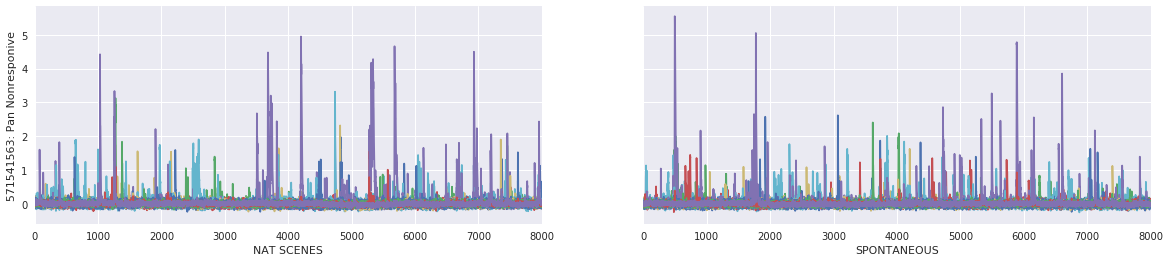

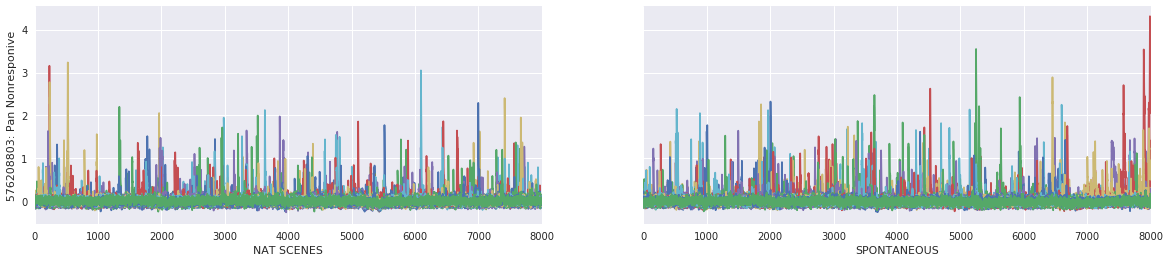

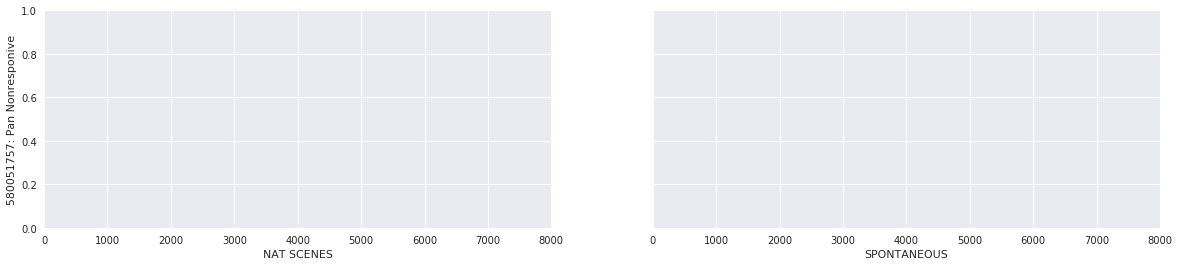

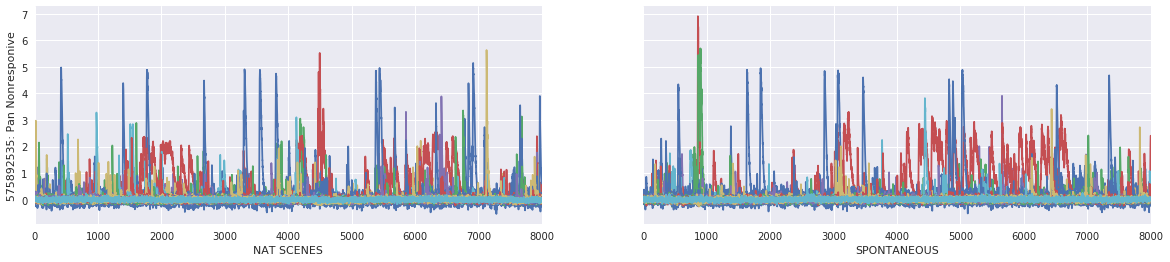

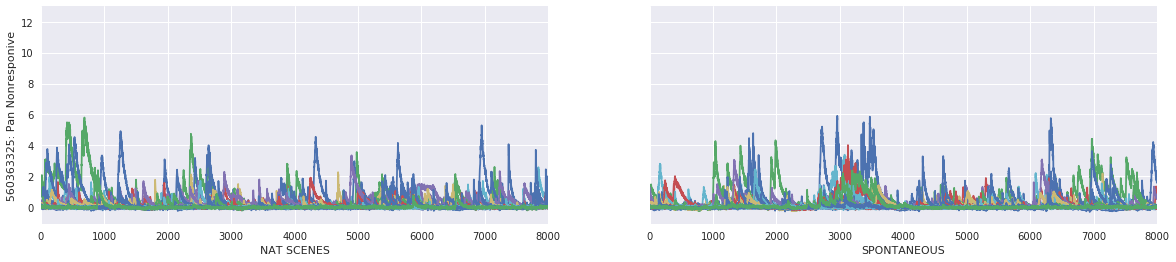

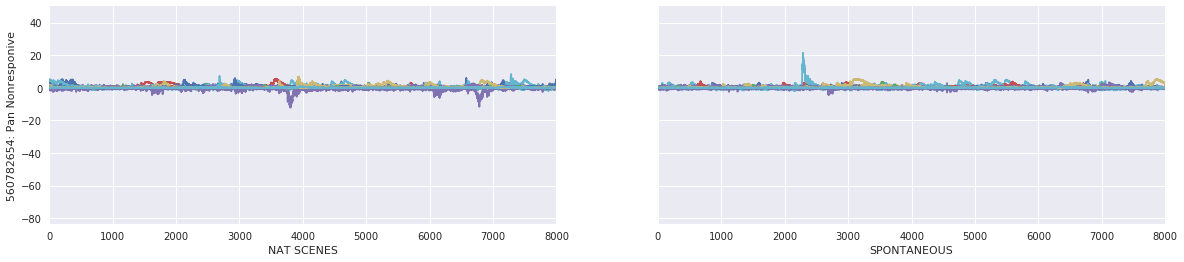

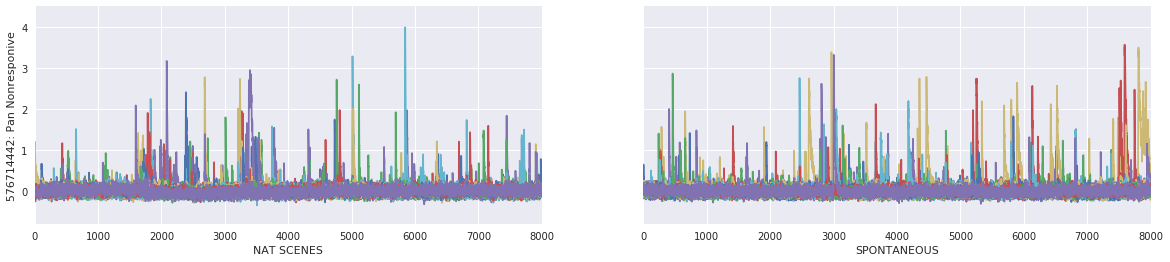

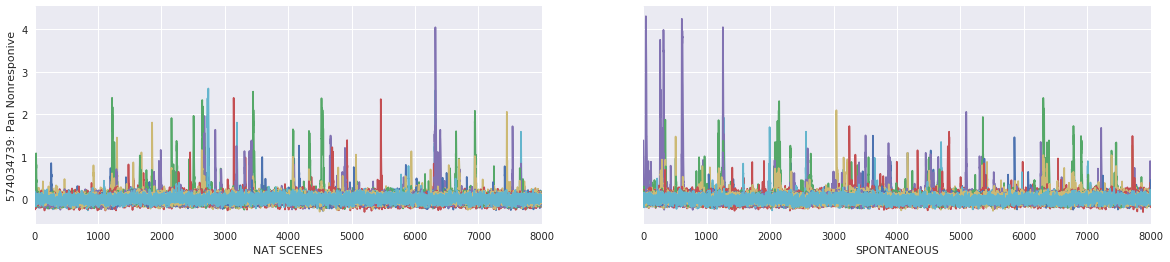

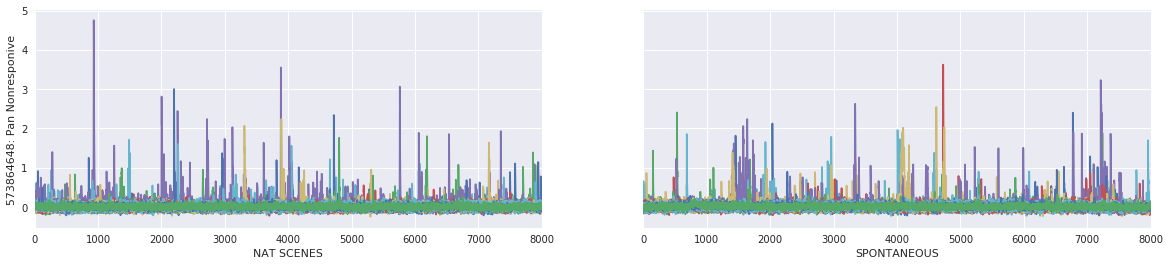

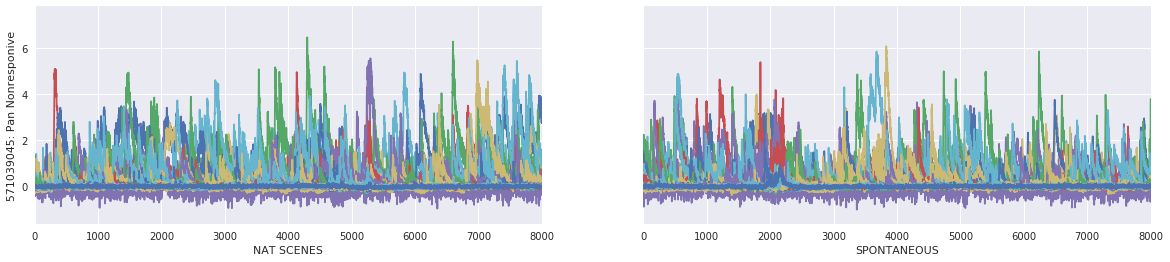

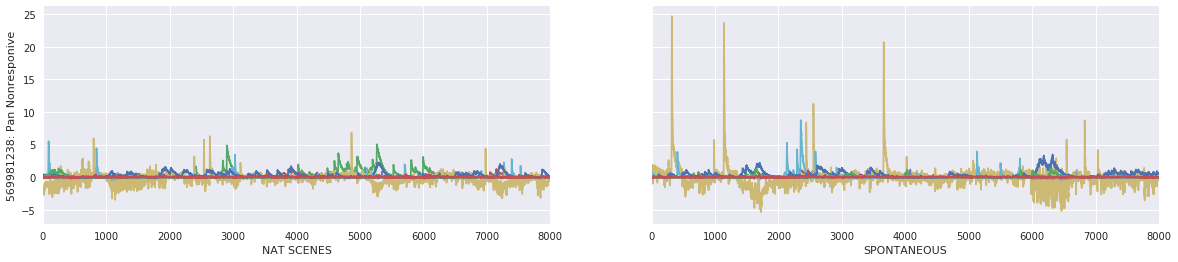

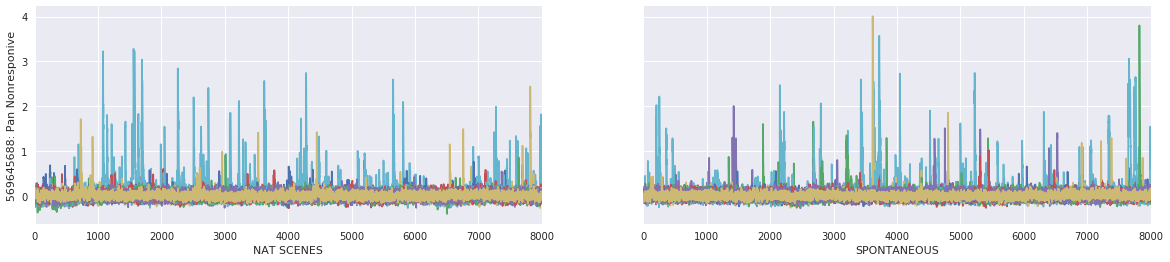

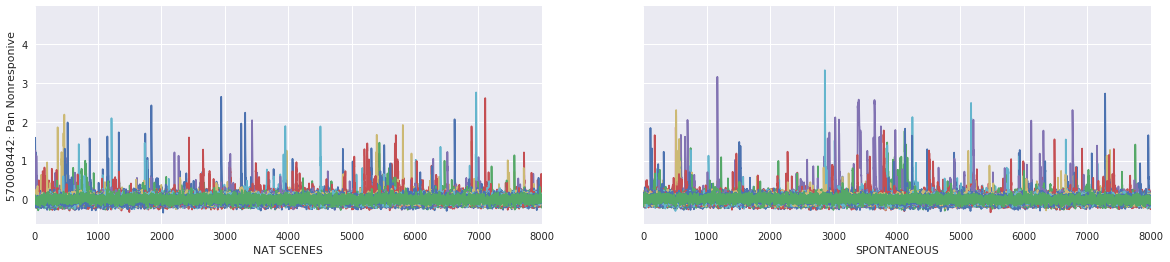

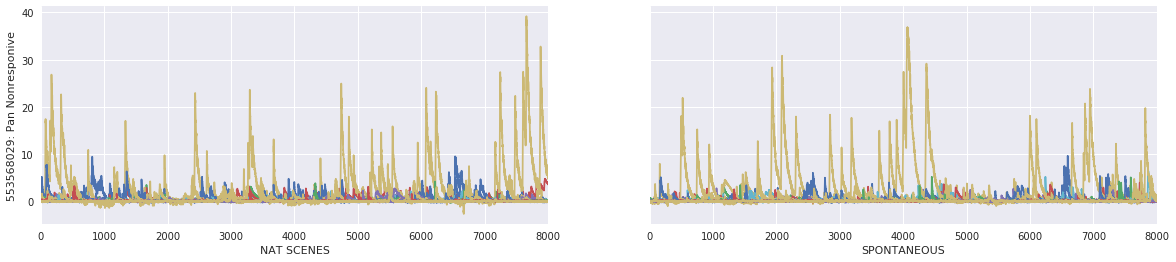

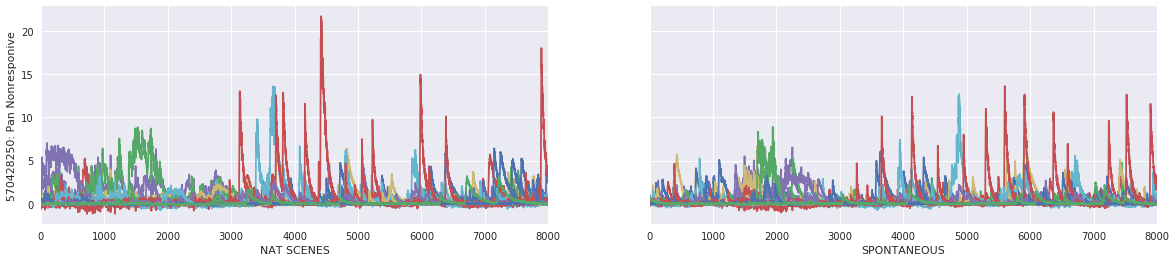

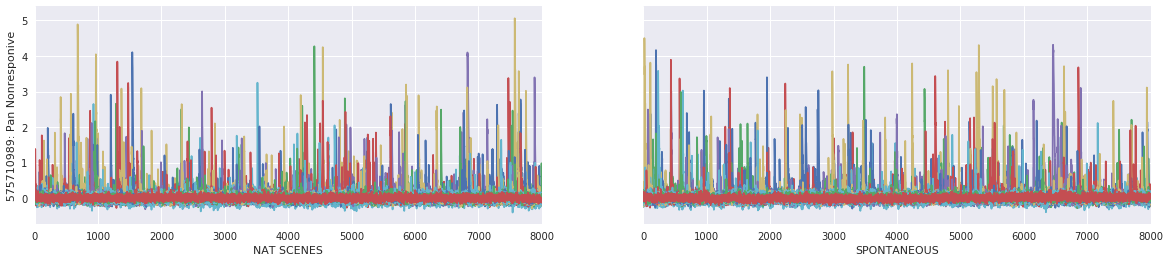

In [22]:
# Loop through each experimental container to create an image with 2 plots
    # Plot 1 [Left Plot] shows delta F trace from natural scenes (First 8000 frames so can compare to 8000 frames of spontaneous)
    # Plot 2[Right Plot] shows delta F trace from spontaneous in session_B (all 8000 frames)
for exp in exp_lis:
    fig, (ax1, ax2)= plt.subplots(1, 2, sharey='row', figsize=(20,4))
    for cell in filteredtrace[exp]['natural_scenes']['nor']:
        ax1.plot(cell)
    for cell in filteredtrace[exp]['spontaneous']['nor']:
        ax2.plot(cell)
    ax1.set( ylabel=(str(exp) + ": Pan Nonresponive"))
    ax1.set( xlabel='NAT SCENES')
    ax1.set_xlim(0,8000)
    ax2.set_xlim(0,8000)
    ax2.set( xlabel='SPONTANEOUS')
# To save images unhash following:
    #plt.savefig((str(exp) + "activity.png"))

## PCA BY IMAGE STIMULI

In [23]:
## PCA on delta f trace during natural scenes
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns; sns.set()

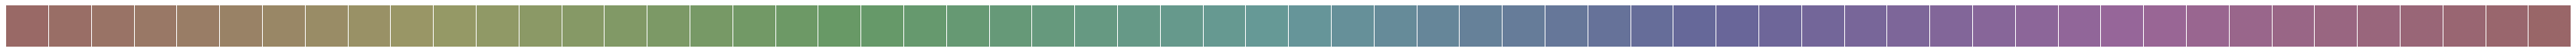

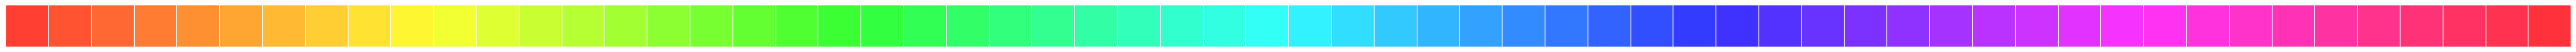

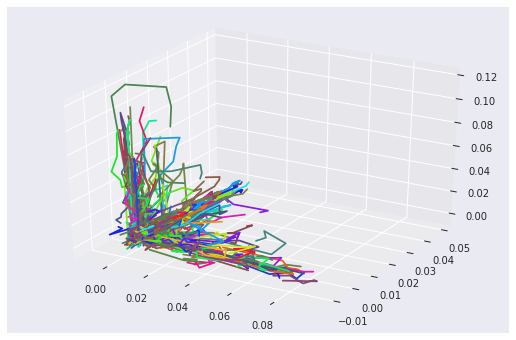

In [24]:
# Generate a PCA plot
generate_natscenes_pca(exp_lis[0], 'nor', filteredtrace, stim_dict, '3D', 'no')
# This plot specifies the following
    # Mouse= exp_lis[0]
    # Reponsivity class of cells plotted= 'nor' (these are cells that do not respond to any stimuli)
    # 3D: this means the PCA will plot in 3D instead of 2D
    # no: this will not upload a properly labeled png of the plotted PCA to my AWS folder